# Weather plots 

From Church farm data
- 2023 August 
- 2024 May & June

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import pytz
from matplotlib.dates import HourLocator, DateFormatter

## Read in all the data

Data accessed from CF weather station 
Kept on home computer and HPC [/ei/projects/9/9742f7cc-c169-405d-bf27-cd520e26f0be/data/results/24_hour/metadata]



In [ ]:
def read_and_process_csv(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Rename the specified column
    df.rename(columns={'Timestamp (UTC+0)': 'date_time'}, inplace=True)
    
    # Convert the date column to datetime format
    df['date_time'] = pd.to_datetime(df['date_time'])

    # Convert from UTC to BST (British Summer Time) to match metadata
    df['date_time'] = df['date_time'].dt.tz_localize('UTC')  # First, localise it to UTC
    bst = pytz.timezone("Europe/London")
    df['date_time'] = df['date_time'].dt.tz_convert(bst)     # Then, convert it to BST
    
    return df

# Run the function
ten_min_23 = read_and_process_csv('../metadata/2023_metadata/10_min.csv')
hourly_23 = read_and_process_csv('../metadata/2023_metadata/hourly.csv')
daily_23 = read_and_process_csv('../metadata/2023_metadata/daily.csv')
ten_min_24 = read_and_process_csv('../metadata/2024_metadata/10_min.csv')
hourly_24 = read_and_process_csv('../metadata/2024_metadata/hourly.csv')
daily_24 = read_and_process_csv('../metadata/2024_metadata/daily.csv')

#Concatenate the different years
ten_min = pd.concat([ten_min_23, ten_min_24])
hourly = pd.concat([hourly_23, hourly_24])
daily = pd.concat([daily_23, daily_24])

#Convert the date columns to datetime format
daily['AirTC_TMn'] = pd.to_datetime(daily['AirTC_TMn'])
daily['AirTC_TMx'] = pd.to_datetime(daily['AirTC_TMx'])

In [31]:
#Start & End times from different experiments - recorded as BST
collections = pd.read_csv('../metadata/collections.csv')
collections['Start'] = pd.to_datetime(collections['Start'], format='%d/%m/%Y %H:%M')
collections['End'] = pd.to_datetime(collections['End'], format='%d/%m/%Y %H:%M')

# Localise as BST (DO NOT convert, because it's already recorded in BST)
bst = pytz.timezone("Europe/London")

collections['Start'] = collections['Start'].dt.tz_localize(bst, ambiguous='NaT', nonexistent='NaT')
collections['End'] = collections['End'].dt.tz_localize(bst, ambiguous='NaT', nonexistent='NaT')

## Filter data bny start & end times

- Loops though collections and filters data for each experiment between the start & end time

In [10]:
def filter_data_by_collection(data, collections):
    # Dictionary to store the filtered DataFrames
    filtered_dfs = {}

    # Iterate over each row in the collection DataFrame
    for _, row in collections.iterrows():
        # Filter the data DataFrame to include only the timestamps within the specified range
        filtered = data[(data['date_time'] >= row['Start']) & (data['date_time'] <= row['End'])]
        
        # Store the filtered DataFrame in the dictionary with the collection name as the key
        filtered_dfs[row['Collection']] = filtered

    return filtered_dfs

# Filter the datasets by collection periods
ten_min_filtered = filter_data_by_collection(ten_min, collections)
hourly_filtered = filter_data_by_collection(hourly, collections)
daily_filtered = filter_data_by_collection(daily, collections) #Don't think this  will be too useful over 24hrs

# Can access each filtered DataFrame using the collection name e.g.
# ten_min_filtered['2024_May_24hr']

## Function to plot

In [46]:
def plot_data(data, title, y_data, y_label):
     # Create a new figure
    plt.figure(figsize=(10, 6))

    min_time = data['date_time'].min() - pd.Timedelta(hours=2)
    max_time = data['date_time'].max() + pd.Timedelta(hours=2)

    bst = pytz.timezone("Europe/London")

    w = sns.lineplot(
        data=data,
        x="date_time",
        y=y_data,
        color="#19261C"
    )

    # Set x-axis properties after plotting the data
    w.xaxis.set_major_locator(HourLocator(interval=3)) 
    # w.xaxis.set_major_formatter(DateFormatter('%H:%M\n%d %b'))  # Format x-axis to show hours and minutes
    
    # Create a DateFormatter with timezone information
    date_formatter = DateFormatter('%H:%M\n%d %b')
    date_formatter.set_tzinfo(bst)
    w.xaxis.set_major_formatter(date_formatter)  # Format x-axis to show hours and minutes in BST

    w.set_xlim(min_time, max_time)  # Set the x-axis limits to match the data
    # w.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    # Rename the labels
    plt.xlabel('Time (Hrs)')
    plt.ylabel(y_label)
    plt.title(title)
    plt.savefig(f'../Graphs/weather_graphs/{title}_{y_data}.png')


## 10min data plots

/Users/berelsom/opt/anaconda3/envs/24hr_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/berelsom/opt/anaconda3/envs/24hr_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/berelsom/opt/anaconda3/envs/24hr_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/berelsom/opt/anaconda3/envs/24hr_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

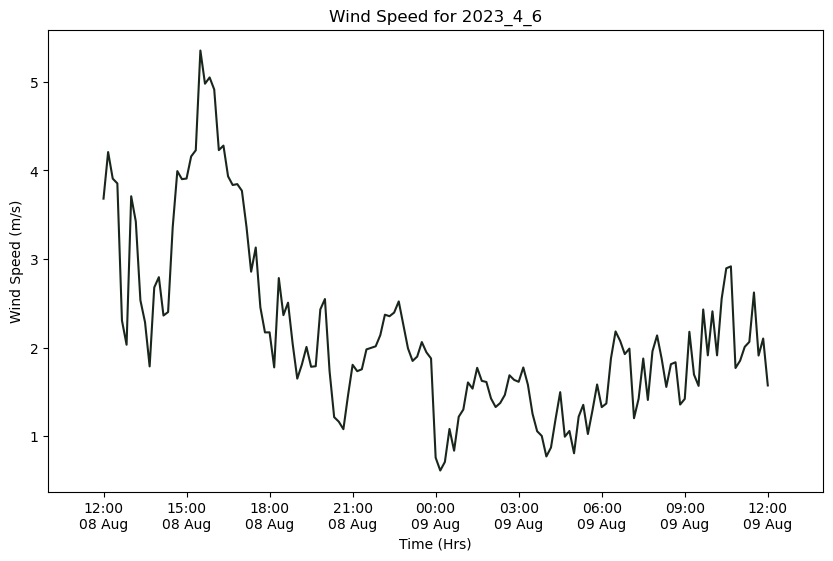

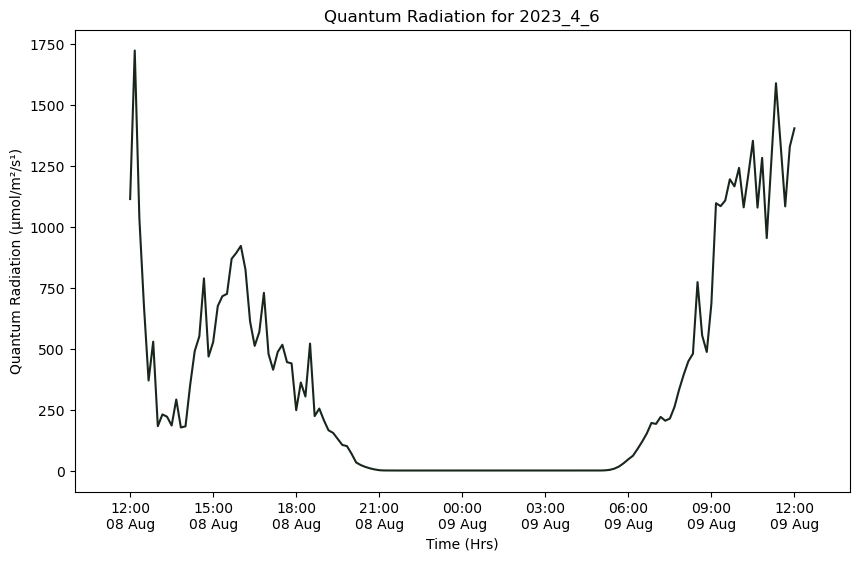

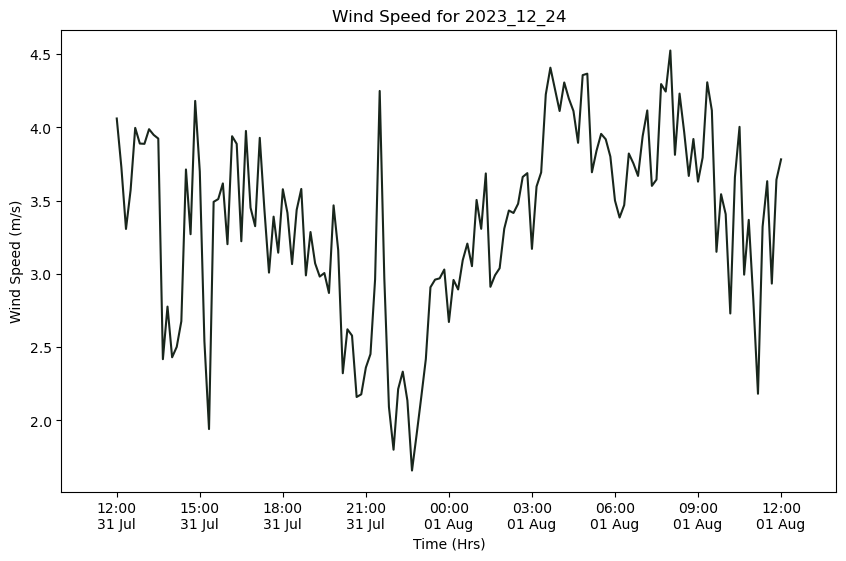

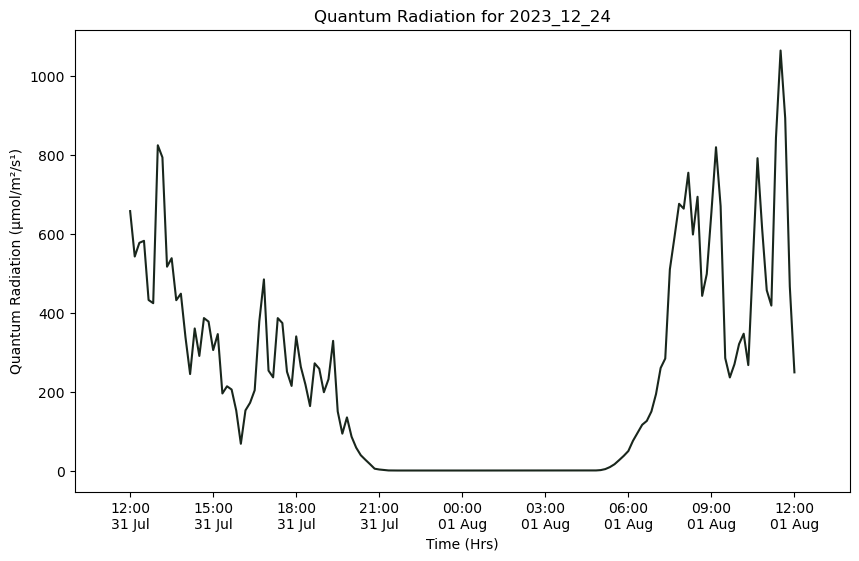

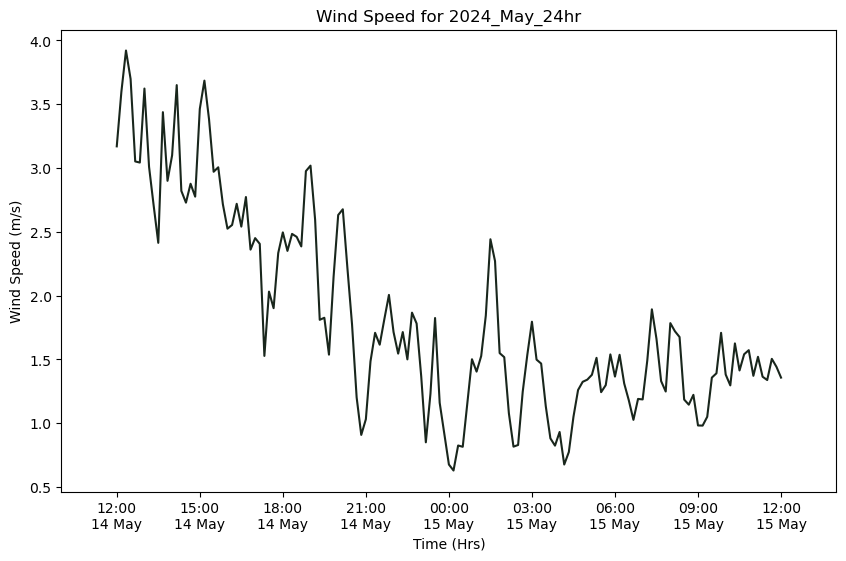

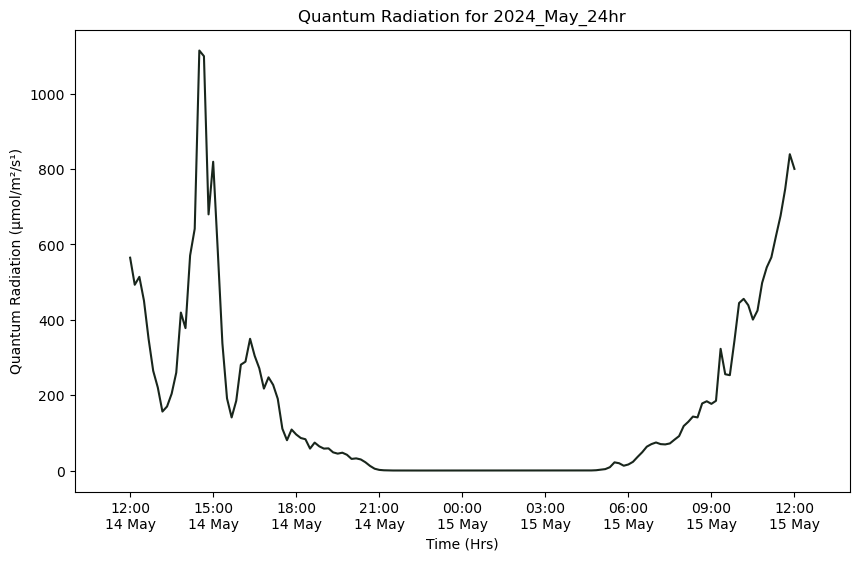

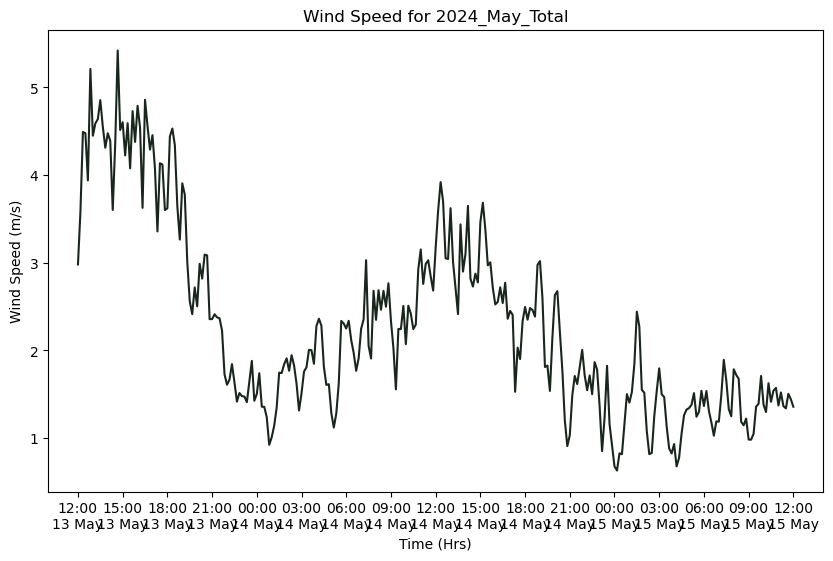

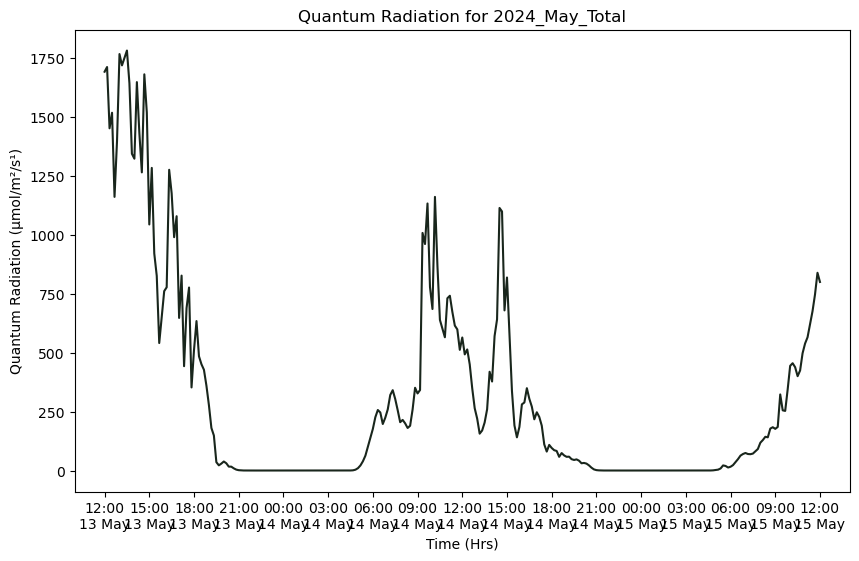

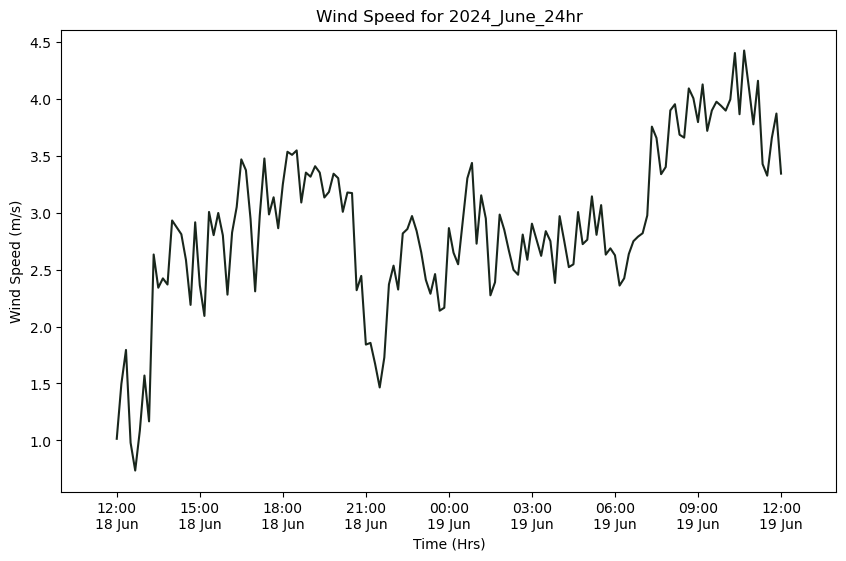

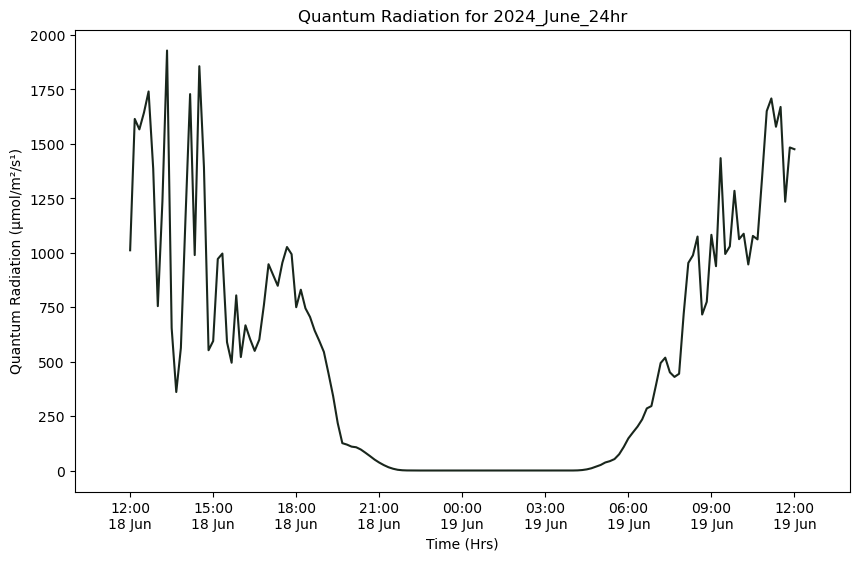

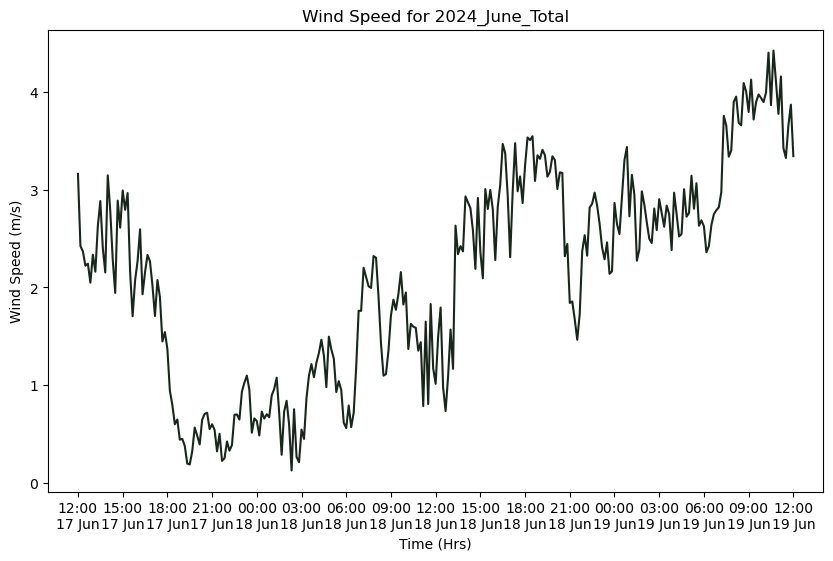

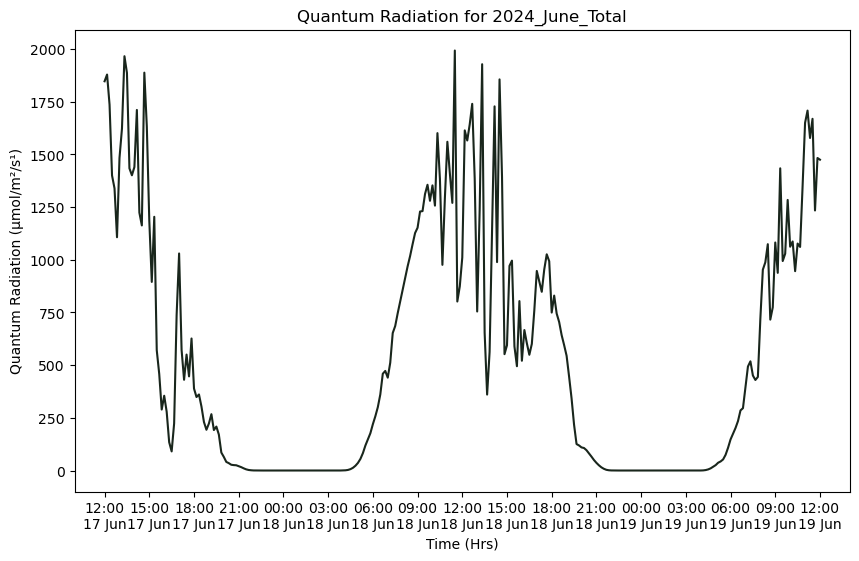

In [47]:
# Loop through the ten min filtered_dfs and plot each one
for collection_name, df in ten_min_filtered.items():
    plot_data(df, f"Wind Speed for {collection_name}", "Mean_WS", "Wind Speed (m/s)")
    plot_data(df, f"Quantum Radiation for {collection_name}", "QR_Avg", "Quantum Radiation (μmol/m²/s¹)")

## Houlry data plots

/Users/berelsom/opt/anaconda3/envs/24hr_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/berelsom/opt/anaconda3/envs/24hr_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/berelsom/opt/anaconda3/envs/24hr_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/berelsom/opt/anaconda3/envs/24hr_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

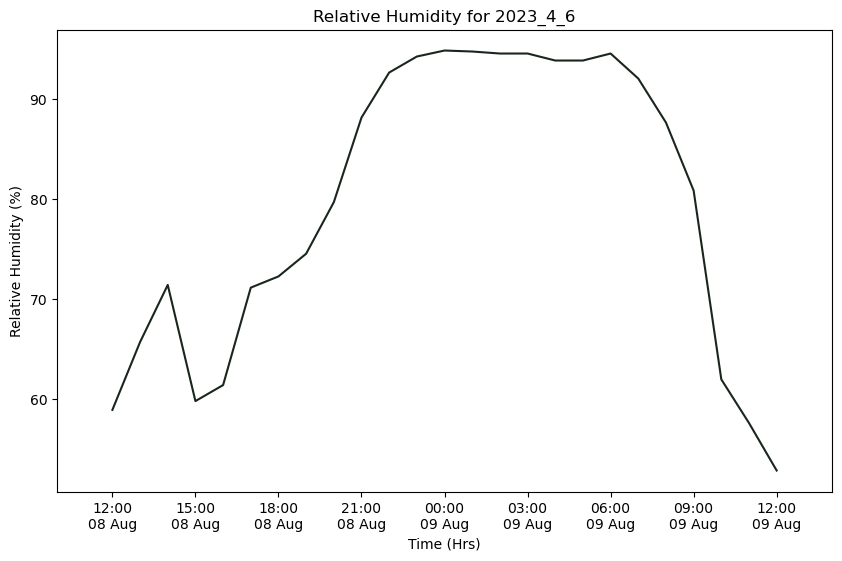

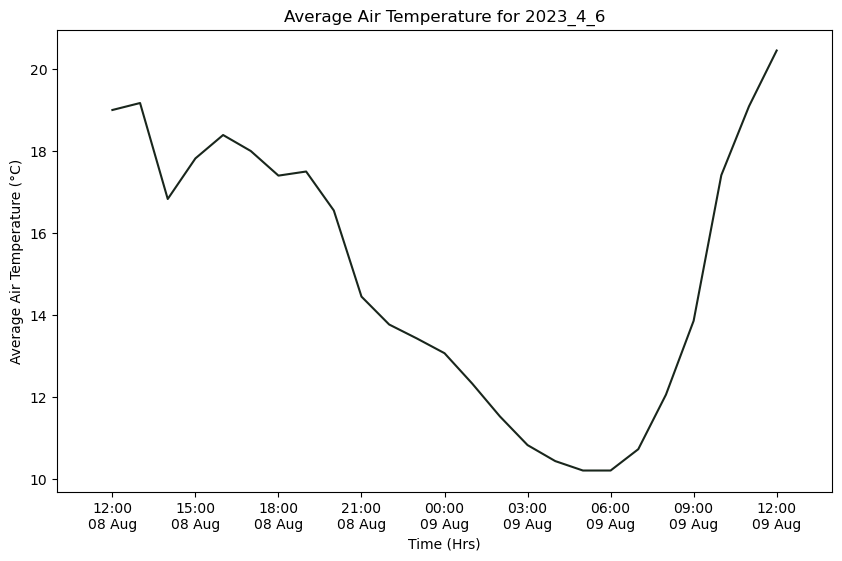

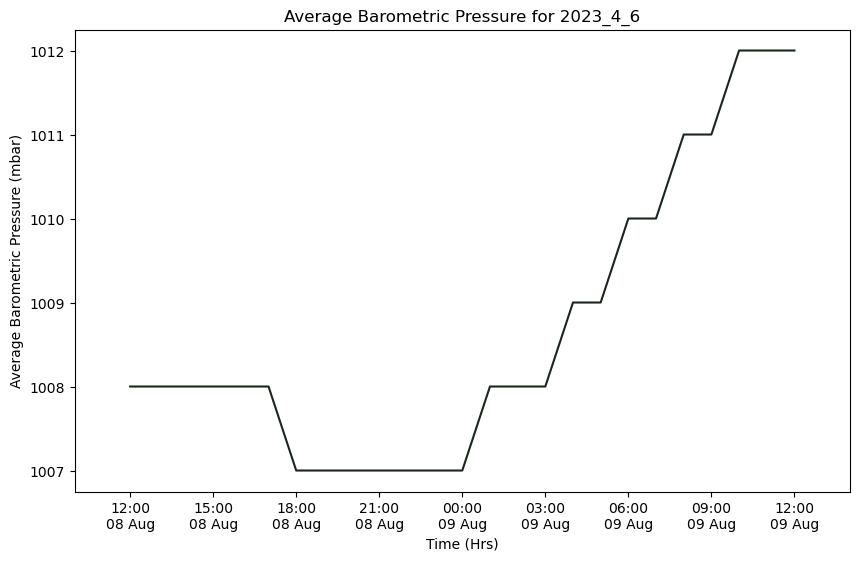

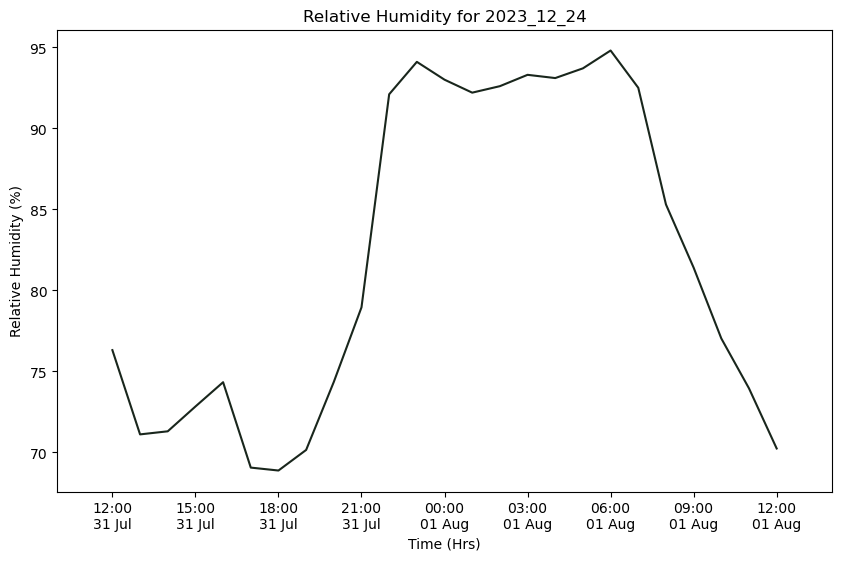

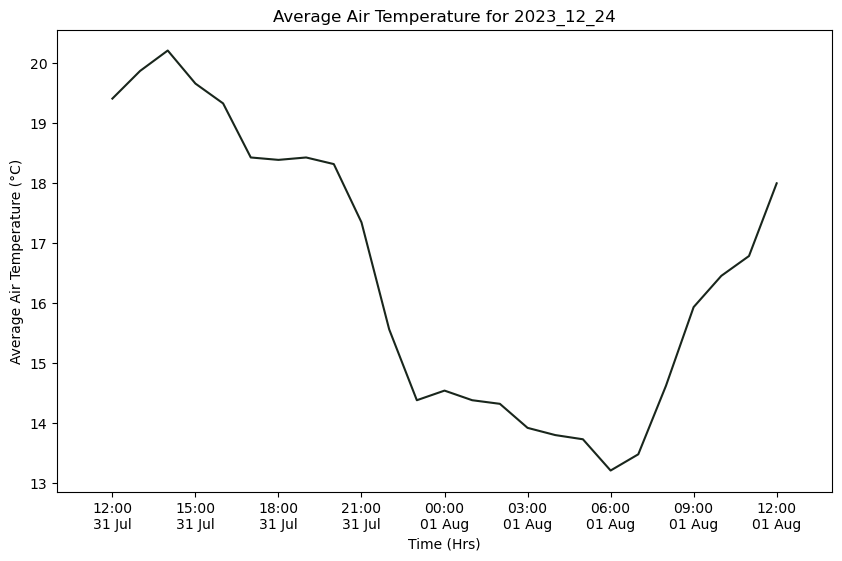

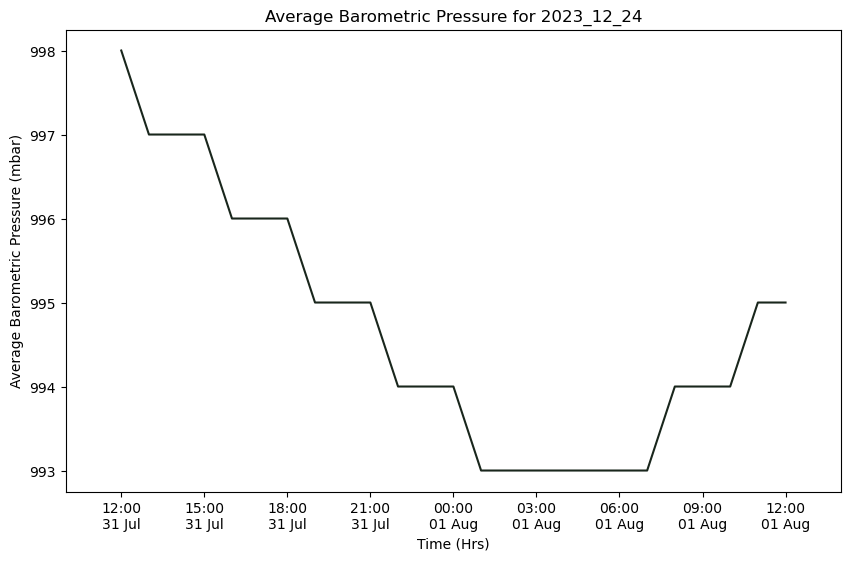

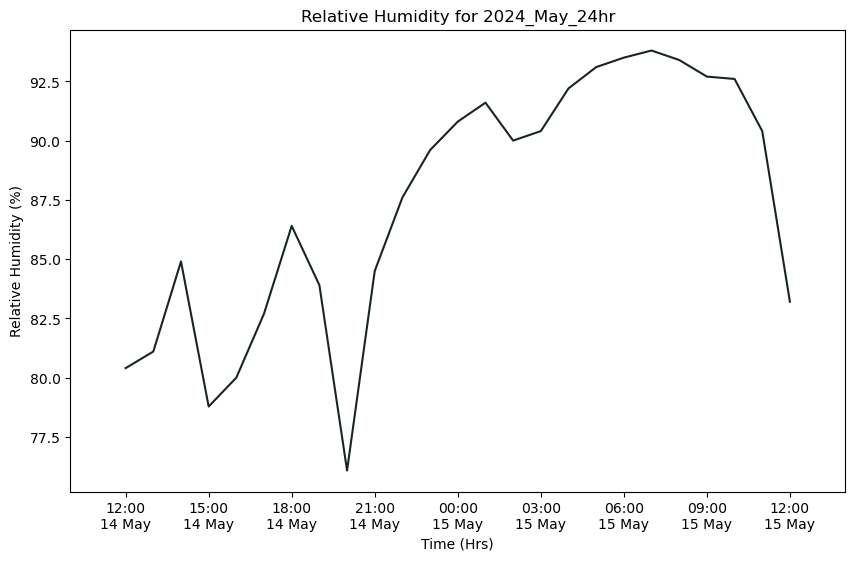

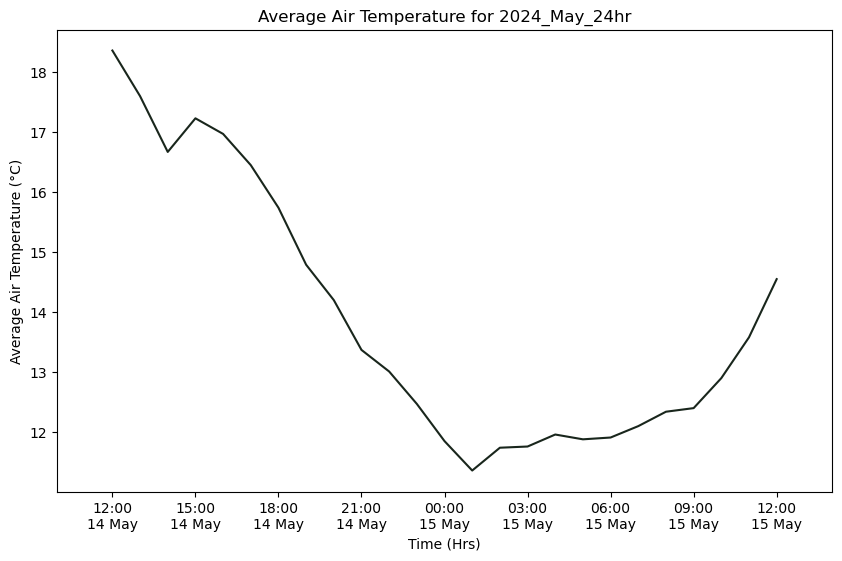

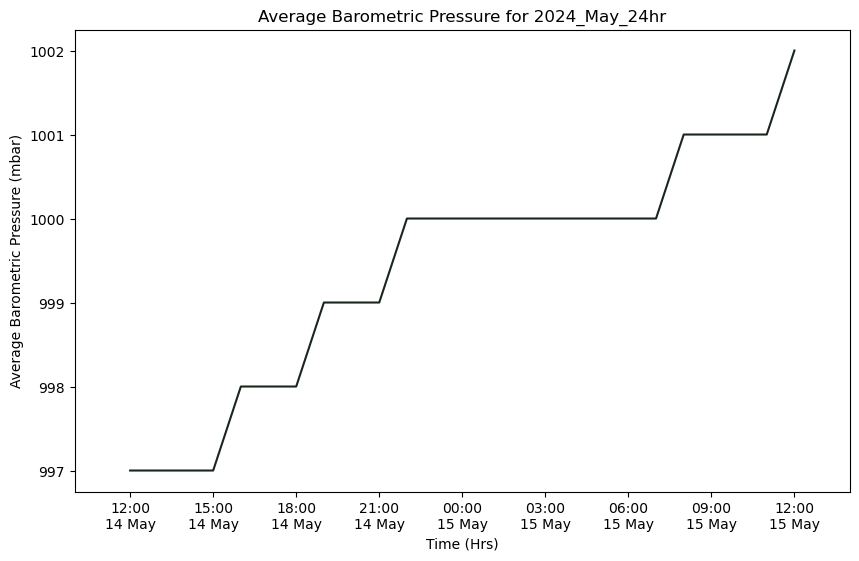

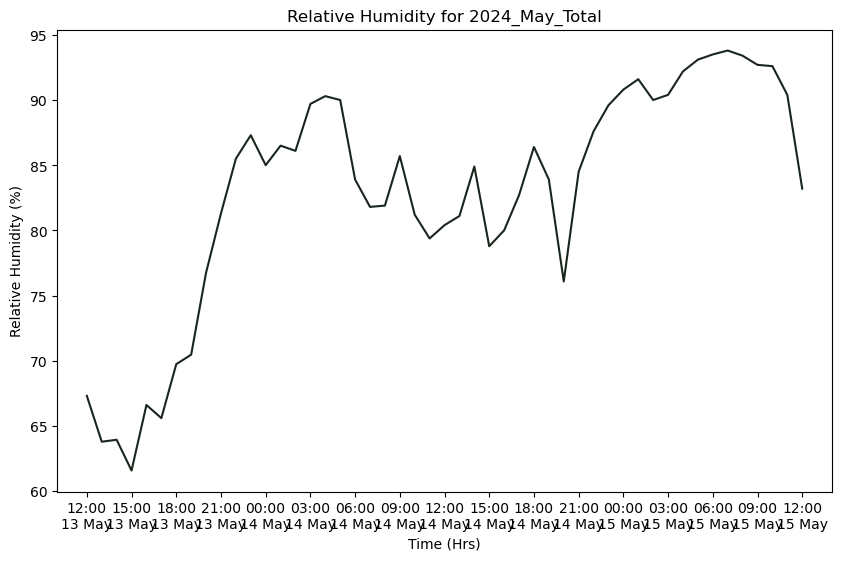

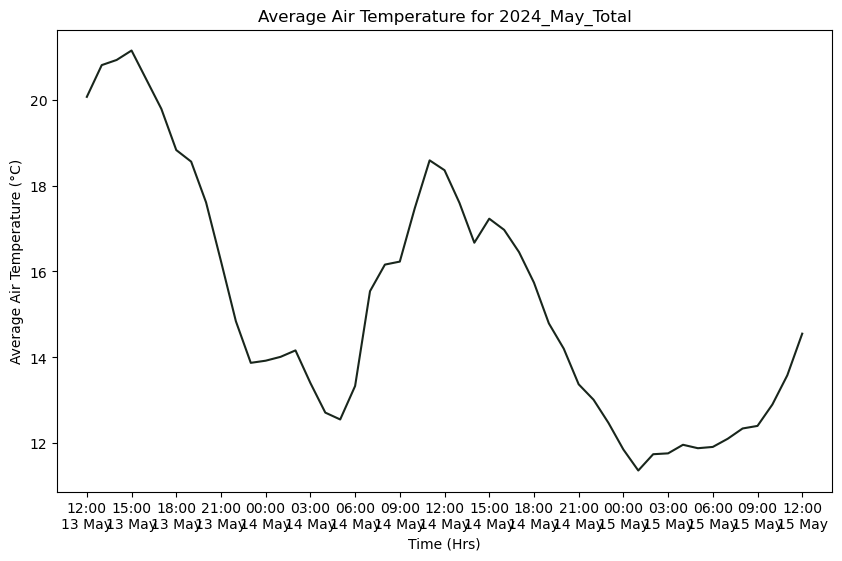

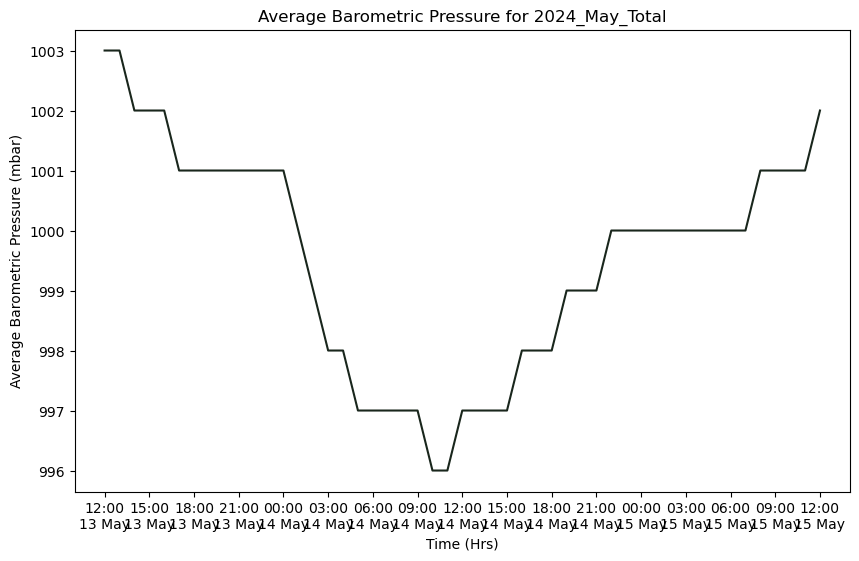

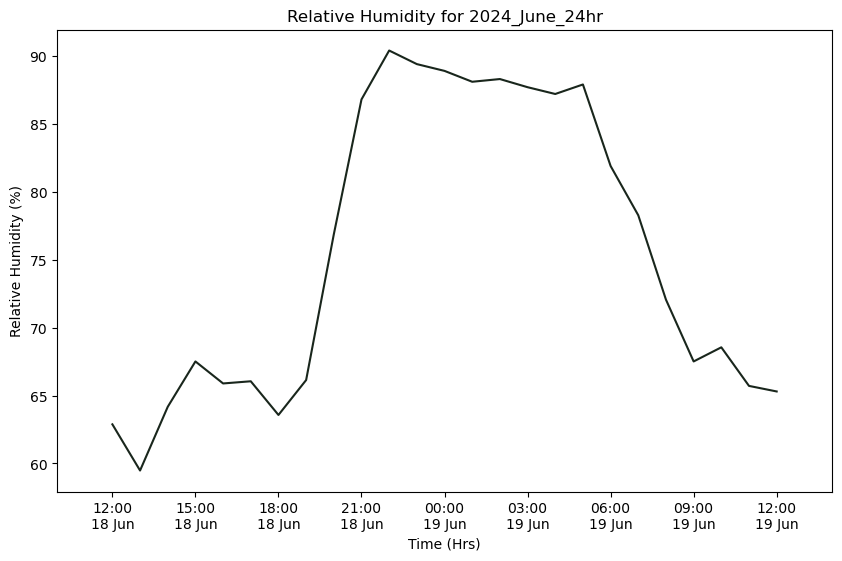

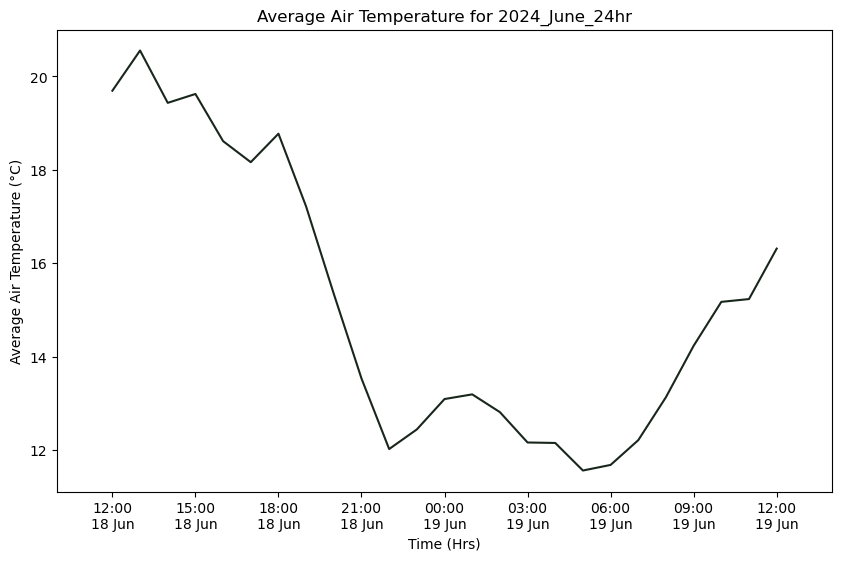

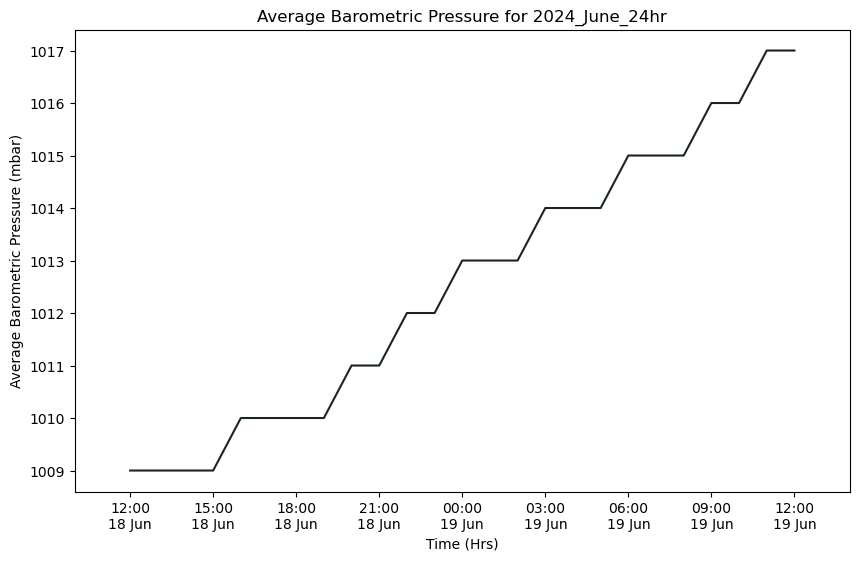

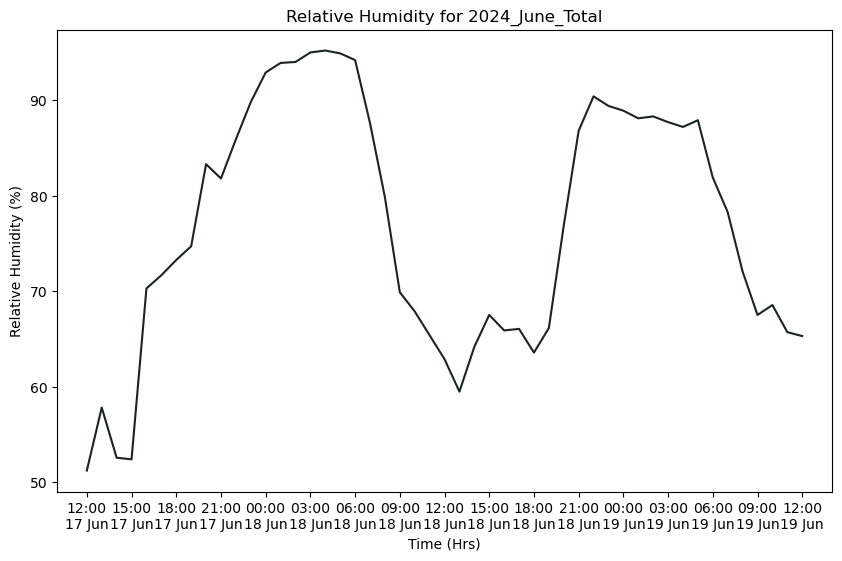

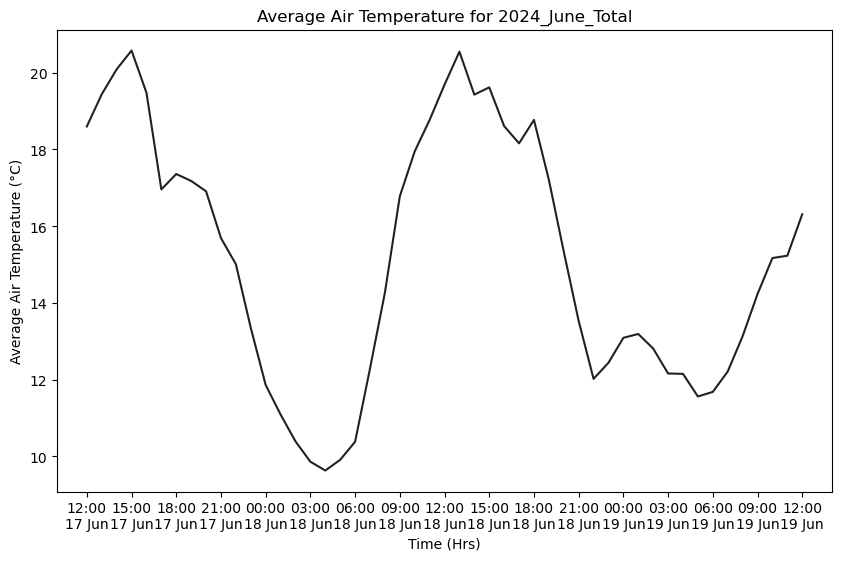

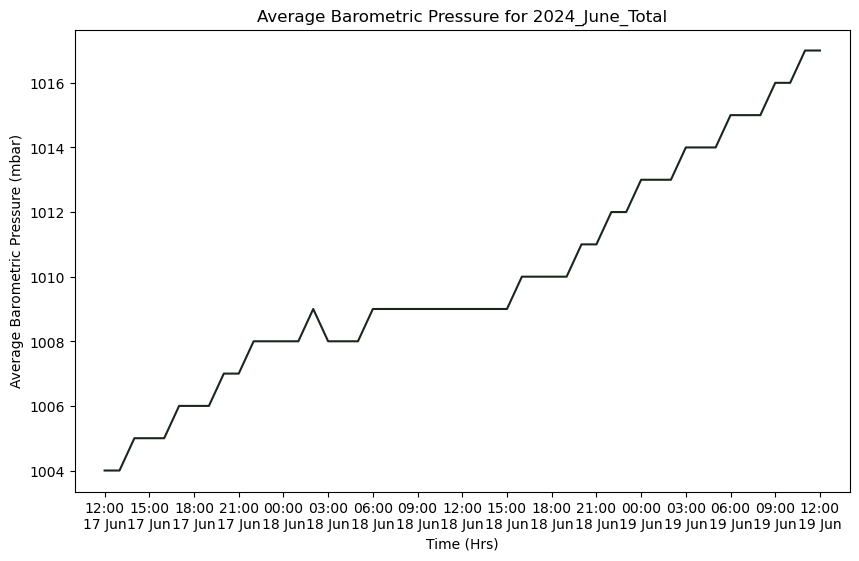

In [48]:
# Loop through the filtered_dfs and plot each one for the desired variables
for collection_name, df in hourly_filtered.items():
    plot_data(df, f'Relative Humidity for {collection_name}', 'RH', 'Relative Humidity (%)')
    plot_data(df, f'Average Air Temperature for {collection_name}', 'AirTC_Avg', 'Average Air Temperature (°C)')
    plot_data(df, f'Average Barometric Pressure for {collection_name}', 'BP_mbar_Avg', 'Average Barometric Pressure (mbar)')